### Problem Statement
##### Classifying users as approved or rejected to receive credit card
##### Label 0 indicates application approved
##### Label 1 indicates application rejected

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mutual_info_score

### Data Ingestion 
#### Dataset was obtained from kaggle
#### https://www.kaggle.com/datasets/rohitudageri/credit-card-details?select=Credit_card.csv

In [2]:
df1 = pd.read_csv("Credit_card.csv")
df2 = pd.read_csv("Credit_card_label.csv")
df1.head(10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,NaN,2
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3


In [3]:
df2.head(10)

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
5,5009753,1
6,5009754,1
7,5009894,1
8,5010864,1
9,5010868,1


### Data Preparation and Wrangling

In [4]:
#merge the two datasets
df = pd.merge(df1, df2, on="Ind_ID")
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [6]:
df.shape

(1548, 19)

In [7]:
#change the column headers into lower case
df.columns = df.columns.str.lower()

In [8]:
df.columns

Index(['ind_id', 'gender', 'car_owner', 'propert_owner', 'children',
       'annual_income', 'type_income', 'education', 'marital_status',
       'housing_type', 'birthday_count', 'employed_days', 'mobile_phone',
       'work_phone', 'phone', 'email_id', 'type_occupation', 'family_members',
       'label'],
      dtype='object')

In [9]:
#rename propert_owner to property_owner
df.rename(columns={'propert_owner':'property_owner'}, inplace=True)

In [10]:
#display the descriptive statistics of the numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_id,1548.0,5.078920e+06,41717.587742,5008827.0,5045069.75,5078841.5,5115673.00,5150412.0
children,1548.0,4.127907e-01,0.776691,0.0,0.00,0.0,1.00,14.0
annual_income,1525.0,1.913993e+05,113252.997656,33750.0,121500.00,166500.0,225000.00,1575000.0
birthday_count,1526.0,-1.604034e+04,4229.503202,-24946.0,-19553.00,-15661.5,-12417.00,-7705.0
employed_days,1548.0,5.936469e+04,137808.062701,-14887.0,-3174.50,-1565.0,-431.75,365243.0
mobile_phone,1548.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
work_phone,1548.0,2.080103e-01,0.406015,0.0,0.00,0.0,0.00,1.0
phone,1548.0,3.094315e-01,0.462409,0.0,0.00,0.0,1.00,1.0
email_id,1548.0,9.237726e-02,0.289651,0.0,0.00,0.0,0.00,1.0
family_members,1548.0,2.161499e+00,0.947772,1.0,2.00,2.0,3.00,15.0


In [11]:
#check for duplicate and null values
df.duplicated().sum()

0

In [12]:
df.isna().sum()

ind_id               0
gender               7
car_owner            0
property_owner       0
children             0
annual_income       23
type_income          0
education            0
marital_status       0
housing_type         0
birthday_count      22
employed_days        0
mobile_phone         0
work_phone           0
phone                0
email_id             0
type_occupation    488
family_members       0
label                0
dtype: int64

In [45]:
#separate the dataset into numeric and categorical
numeric = df.select_dtypes(include=[np.number]).columns
categorical = df.select_dtypes(include=['object']).columns

In [13]:
#fill the nan values of the numerica columns with mean values
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)
df.select_dtypes(include = "number")

,ind_id,children,annual_income,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,family_members,label
0,5008827,0,180000.0,-18772.0,365243,1,0,0,0,2,1
1,5009744,0,315000.0,-13557.0,-586,1,1,1,0,2,1
2,5009746,0,315000.0,-16040.3,-586,1,1,1,0,2,1
3,5009749,0,191399.3,-13557.0,-586,1,1,1,0,2,1
4,5009752,0,315000.0,-13557.0,-586,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,191399.3,-11957.0,-2182,1,0,0,0,2,0
1544,5023655,0,225000.0,-10229.0,-1209,1,0,0,0,1,0
1545,5115992,2,180000.0,-13174.0,-2477,1,0,0,0,4,0
1546,5118219,0,270000.0,-15292.0,-645,1,1,1,0,2,0


In [ ]:
#fill the null values in categorical columns with the most occuring string for each column 
df[categorical] = df[categorical].fillna(df[categorical].mode().iloc[0])

In [46]:
df.isna().sum()

ind_id             0
gender             0
car_owner          0
property_owner     0
children           0
annual_income      0
type_income        0
education          0
marital_status     0
housing_type       0
birthday_count     0
employed_days      0
mobile_phone       0
work_phone         0
phone              0
email_id           0
type_occupation    0
family_members     0
label              0
dtype: int64

### Exploratory Data Analysis (EDA)

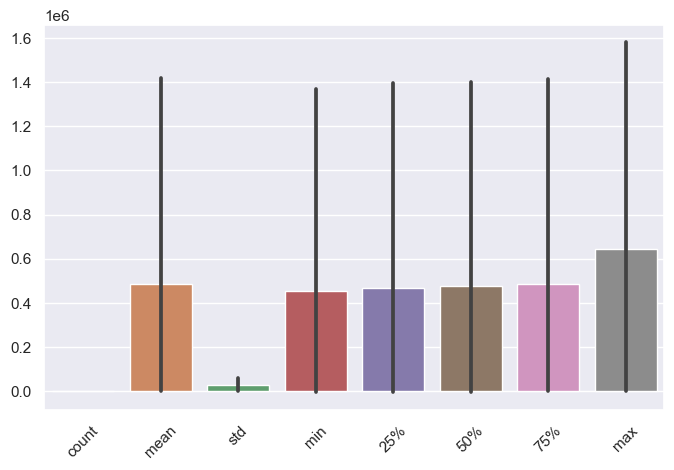

In [61]:
#plotting the dtatistical description of the numerical columns
description = df.describe().T
sns.barplot(data=description)
plt.xticks(rotation=45)
plt.show()

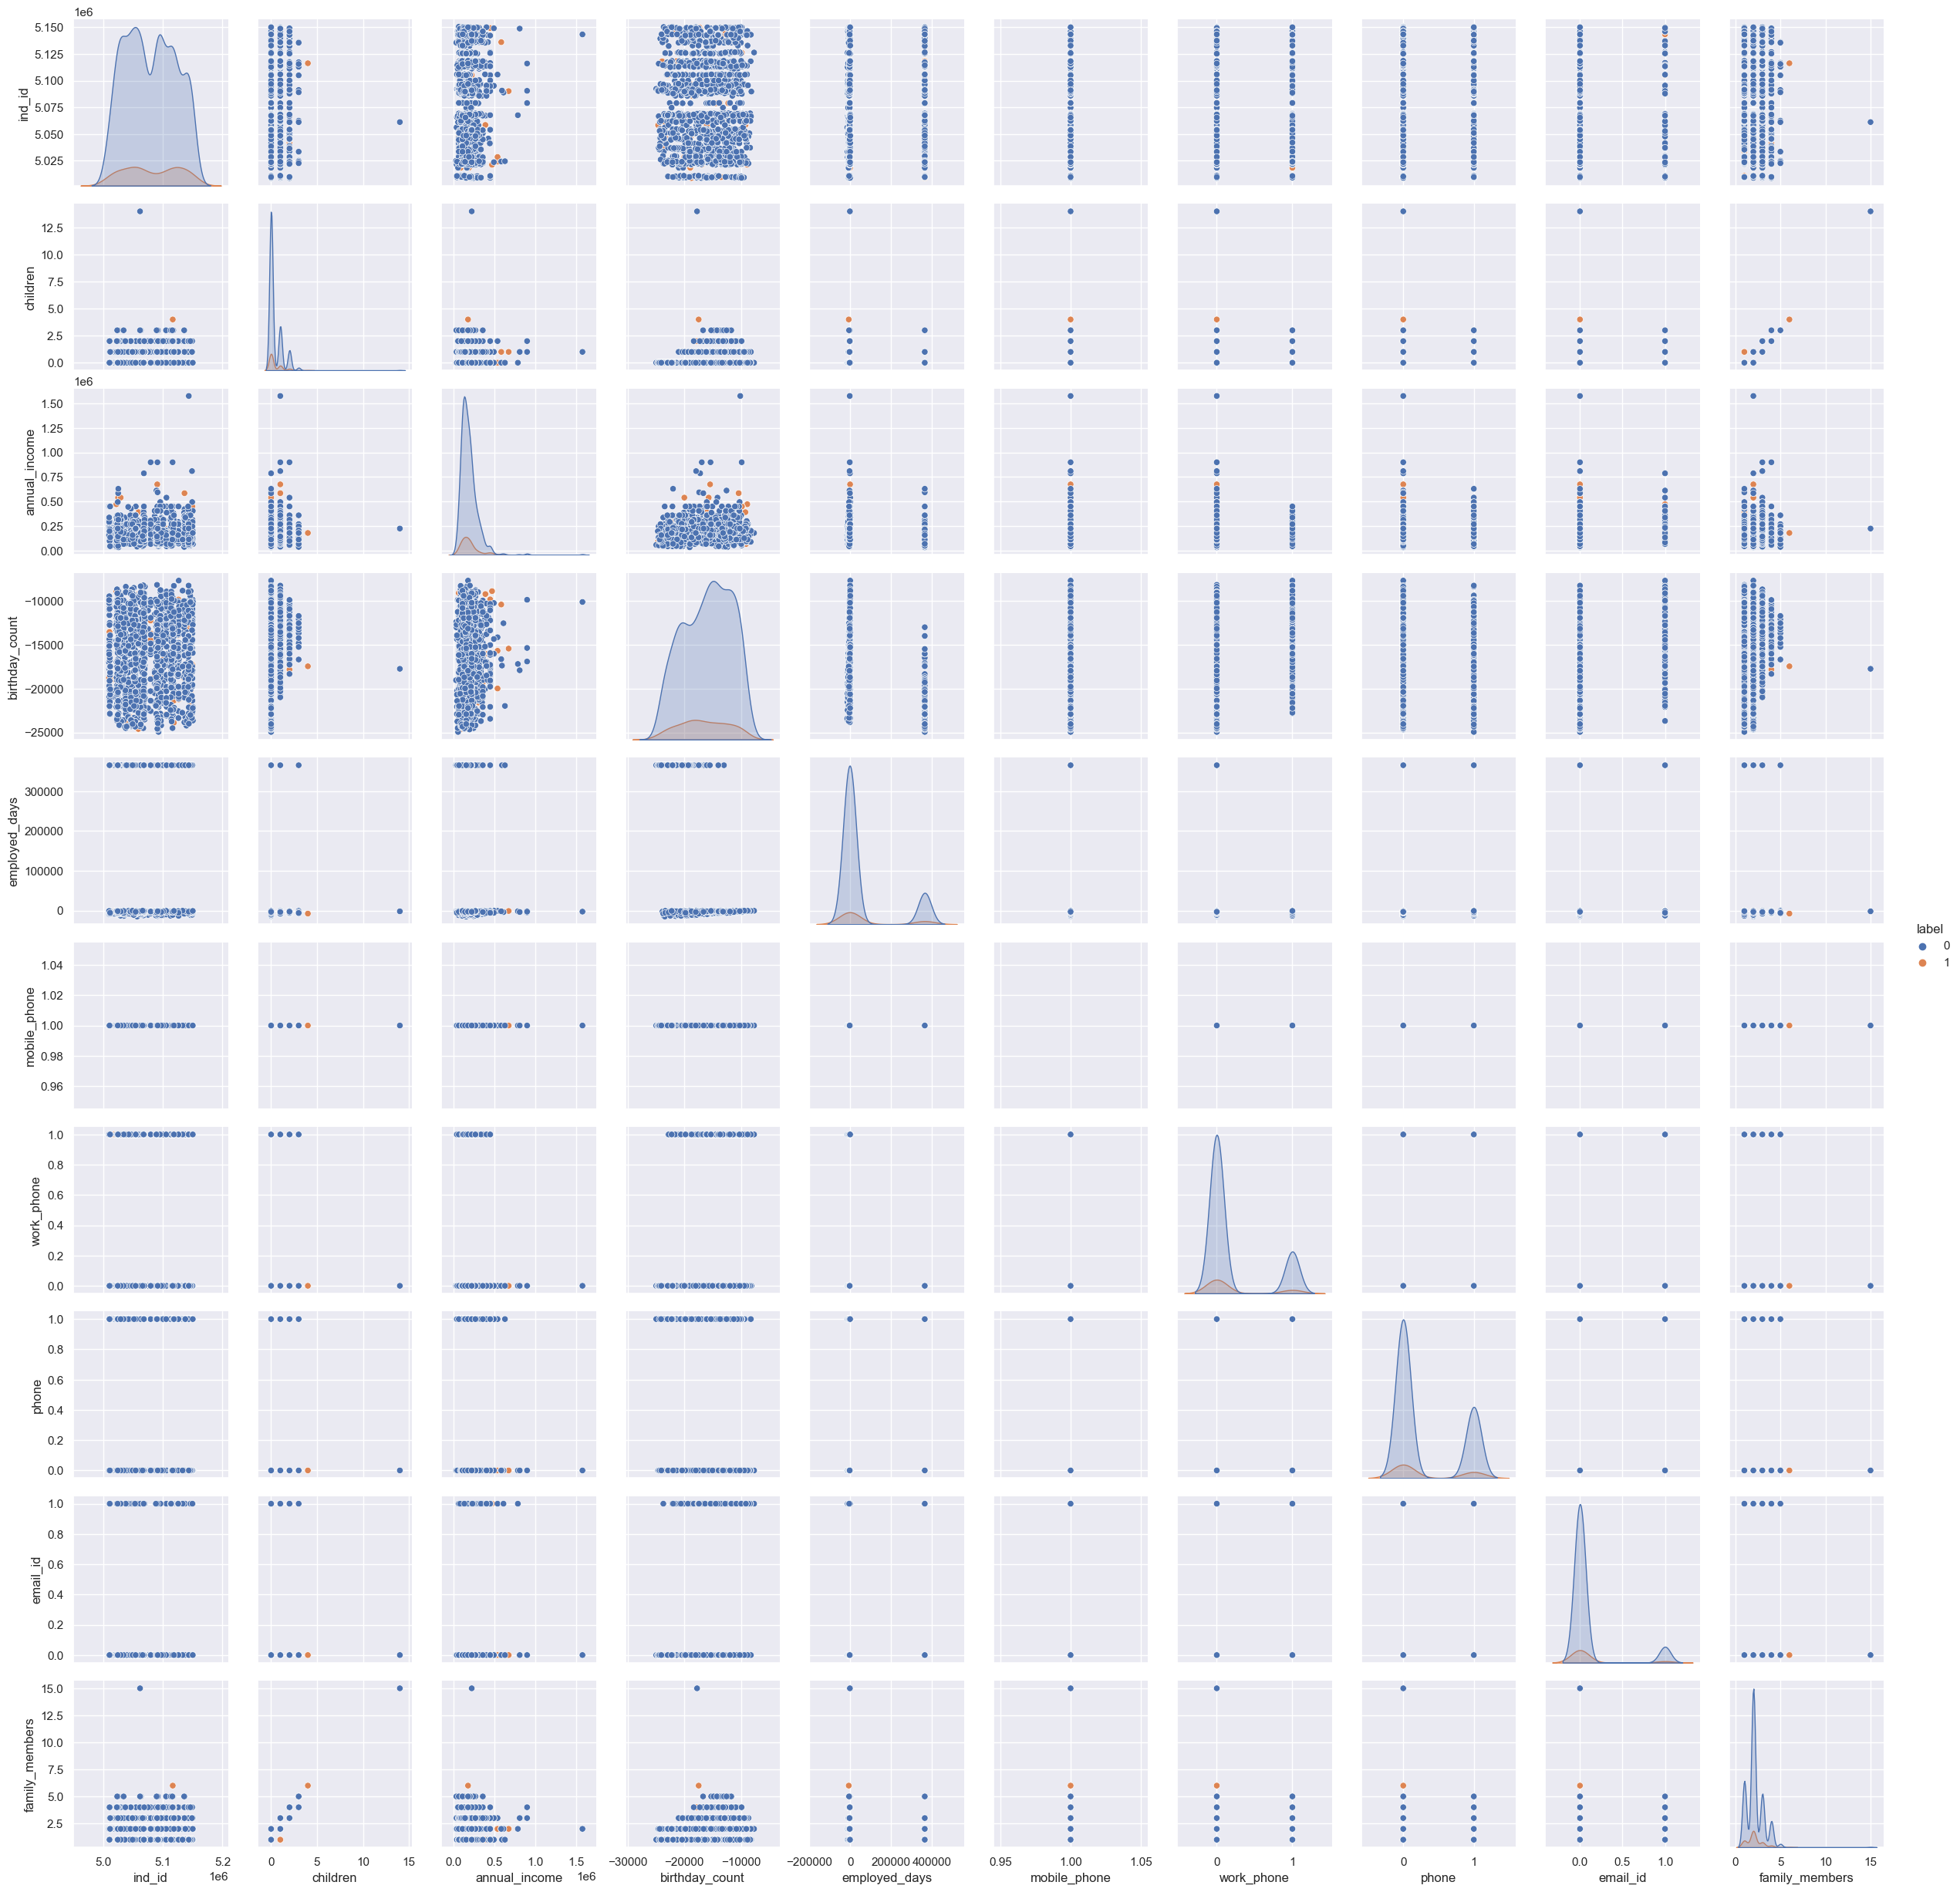

In [78]:
#plotting the feature distributions
sns.set(rc={'figure.figsize':(15, 6)})
sns.pairplot(data=df, hue='label')
plt.xticks(rotation=45)
plt.show()

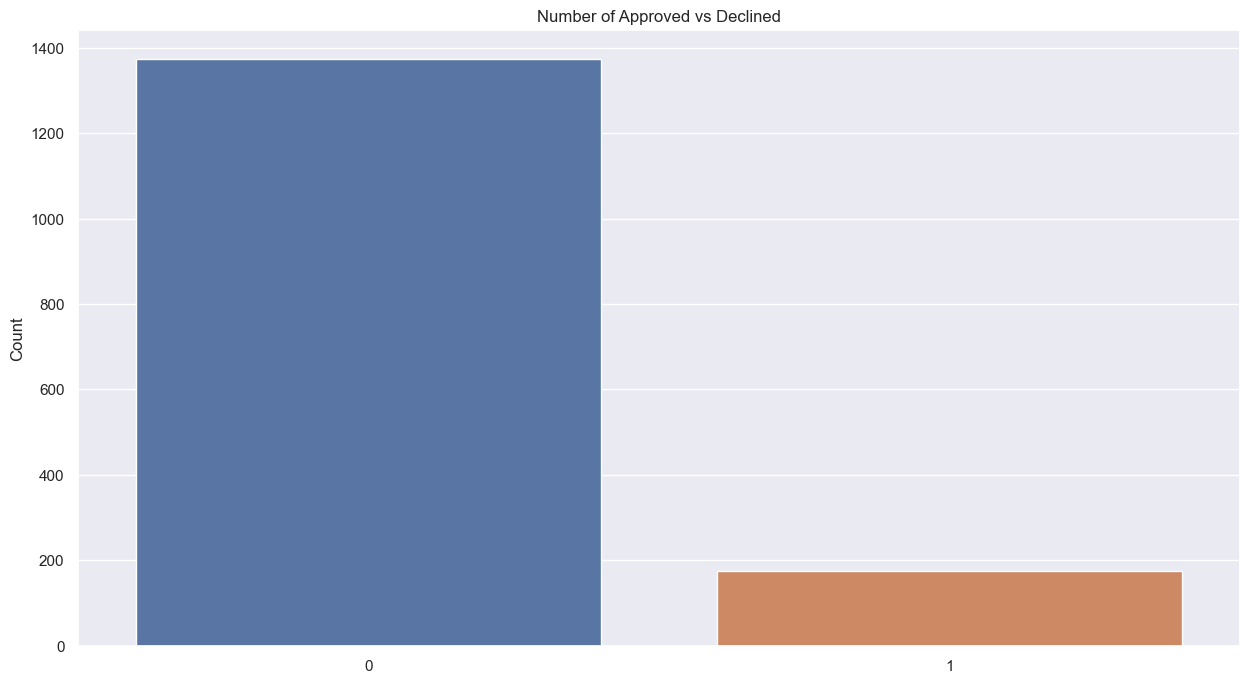

In [73]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=df['label'].value_counts().index, y=df['label'].value_counts().values)
plt.title("Number of Approved vs Declined")
plt.ylabel('Count')
plt.xticks()
plt.show()

##### Insight: Number of Approved Credit Card Applications outweigh Declined Applications

<Axes: >

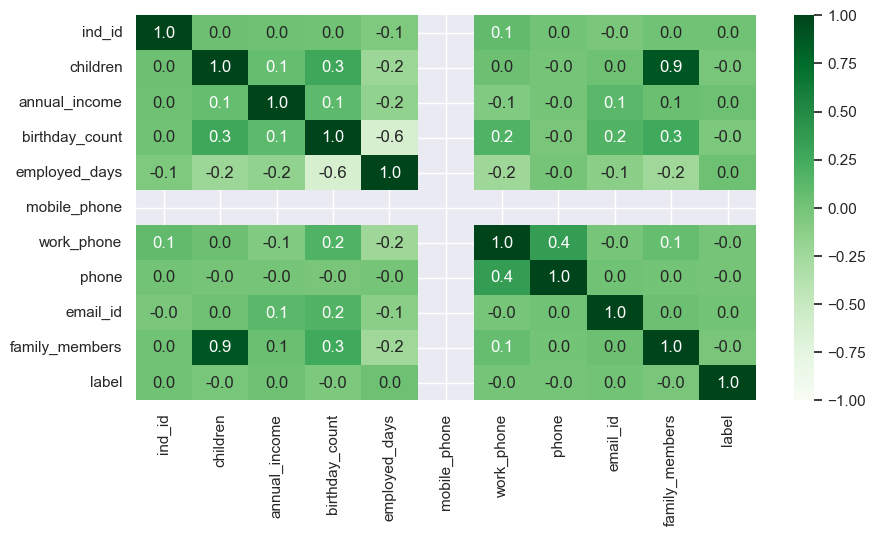

In [76]:
plt.figure(figsize=(10,5))
corr_matrix= df.corr(numeric_only=True).round(3)
sns.heatmap(corr_matrix, annot=True, cmap='Greens', vmin=-1, vmax= 1, fmt=".1f")

#### There is high correlation between family_members and children.
#### We keep both features but ideally if there are highly correlated features, removing one is good practice

#### Split the Dataset into train(60%), test(20%), and val(20%)

In [80]:
#set SEED value = 42
SEED = 42
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

In [81]:
len(df), len(df_full_train),len(df_test) ,len(df_train) + len(df_val)

(1548, 1238, 310, 1238)

In [82]:
# reset the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [83]:
#split the churn column from the rest of the dataframe
y_train = df_train.label.values
y_val = df_val.label.values
y_test = df_test.label.values

In [85]:
del df_train['label']
del df_val['label']
del df_test['label']

#### Feature Importance: Decline Rate and Risk ratio 
##### Identifying features that have higher effect on the target value
##### Decline Rate
##### Risk Ration
##### Mutual information

In [86]:
#global decline rate
global_decline_rate = df_full_train.label.mean().round(2)
global_decline_rate

0.12

##### Risk Ratio
##### if the group_decline_rate / global_decline_rate > 1 -> the group(feature) is more likely to be declined
##### if the group_decline_rate / global_decline_rate < 1 -> the group(feature) is less likely to be declined

In [89]:
#create a new dataframe to perform Decline rate and risk ratio for the categorical columns
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).label.agg(['mean', 'count'])
    df_group['diff'] = global_decline_rate - df_group['mean']
    df_group['risk'] =  df_group['mean'] / global_decline_rate 
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
F,0.104592,784,0.015408,0.871599
M,0.138767,454,-0.018767,1.156388




car_owner


,mean,count,diff,risk
car_owner,,,,
N,0.113333,750,0.006667,0.944444
Y,0.122951,488,-0.002951,1.024590




property_owner


,mean,count,diff,risk
property_owner,,,,
N,0.120092,433,-0.000092,1.000770
Y,0.115528,805,0.004472,0.962733




type_income


,mean,count,diff,risk
type_income,,,,
Commercial associate,0.143836,292,-0.023836,1.198630
Pensioner,0.157407,216,-0.037407,1.311728
State servant,0.062500,96,0.057500,0.520833
Working,0.099369,634,0.020631,0.828076




education


,mean,count,diff,risk
education,,,,
Academic degree,0.000000,1,0.120000,0.000000
Higher education,0.143266,349,-0.023266,1.193887
Incomplete higher,0.074074,54,0.045926,0.617284
Lower secondary,0.357143,14,-0.237143,2.976190
Secondary / secondary special,0.104878,820,0.015122,0.873984




marital_status


,mean,count,diff,risk
marital_status,,,,
Civil marriage,0.052632,76,0.067368,0.438596
Married,0.116745,848,0.003255,0.972877
Separated,0.154930,71,-0.034930,1.291080
Single / not married,0.131148,183,-0.011148,1.092896
Widow,0.116667,60,0.003333,0.972222




housing_type


,mean,count,diff,risk
housing_type,,,,
Co-op apartment,0.250000,4,-0.130000,2.083333
House / apartment,0.109304,1107,0.010696,0.910870
Municipal apartment,0.311111,45,-0.191111,2.592593
Office apartment,0.166667,6,-0.046667,1.388889
Rented apartment,0.166667,18,-0.046667,1.388889
With parents,0.086207,58,0.033793,0.718391




type_occupation


,mean,count,diff,risk
type_occupation,,,,
Accountants,0.135135,37,-0.015135,1.126126
Cleaning staff,0.071429,14,0.048571,0.595238
Cooking staff,0.235294,17,-0.115294,1.960784
Core staff,0.148936,141,-0.028936,1.241135
Drivers,0.100000,70,0.020000,0.833333
HR staff,0.000000,3,0.120000,0.000000
High skill tech staff,0.098039,51,0.021961,0.816993
IT staff,1.000000,2,-0.880000,8.333333
Laborers,0.113115,610,0.006885,0.942623


#### Feature Importance: Mutual information

In [94]:
def mutual_info_decline_rate(series):
    return mutual_info_score(series, df_full_train.label)

In [95]:
mutual_info = df_full_train[categorical].apply(mutual_info_decline_rate)
mutual_info.sort_values(ascending=False)

type_occupation    0.012232
housing_type       0.005764
type_income        0.004156
education          0.004113
marital_status     0.002017
gender             0.001287
car_owner          0.000106
property_owner     0.000023
dtype: float64